In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# check for the missing data
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Roughly 20 percent of Age data is missing. The missing age values can be  filled using imputation technique.The Cabin columns e missing data seems to be way too much. So this can be dropped or change it into 'cabin known: 1 or 0'

In [9]:
df=df.set_index('PassengerId')

In [10]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#EXPLORATORY DATA ANALYSIS
corr=df.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot: >

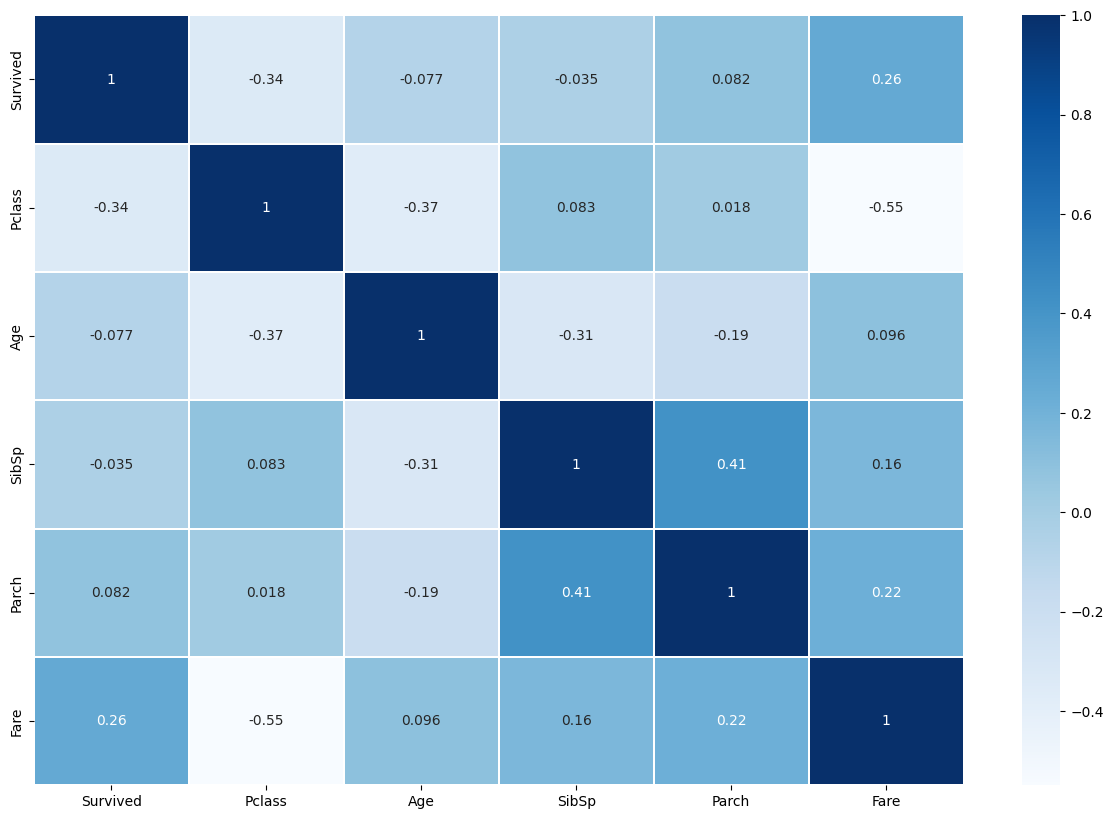

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap='Blues',annot=True,linewidth=.3)

<AxesSubplot: xlabel='Survived', ylabel='count'>

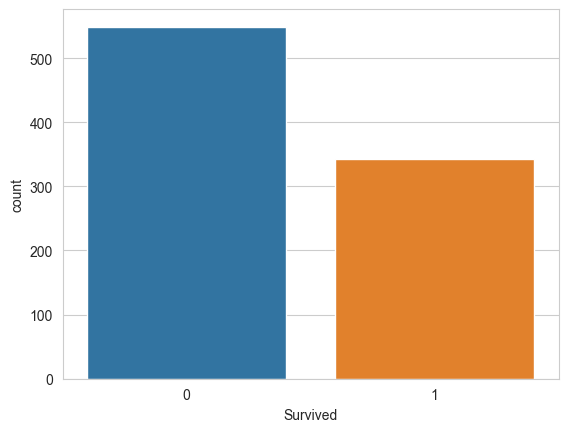

In [14]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=df)

Data is not fully balanced.Around 300 plus survived and around 500 plus not survived people

<AxesSubplot: xlabel='Survived', ylabel='count'>

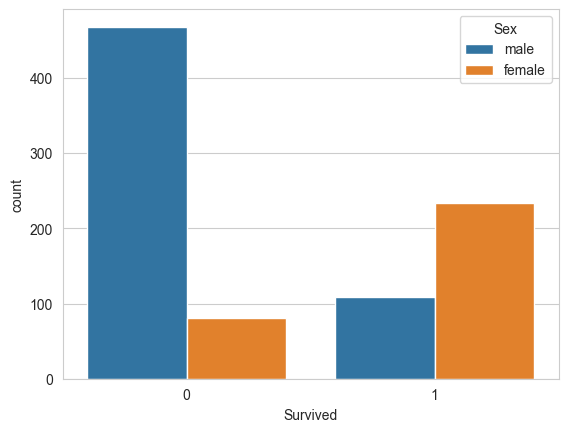

In [16]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=df,hue='Sex')

It is clear that not survived male count is around 500 and not survived female count below than 100.

<AxesSubplot: xlabel='Pclass', ylabel='count'>

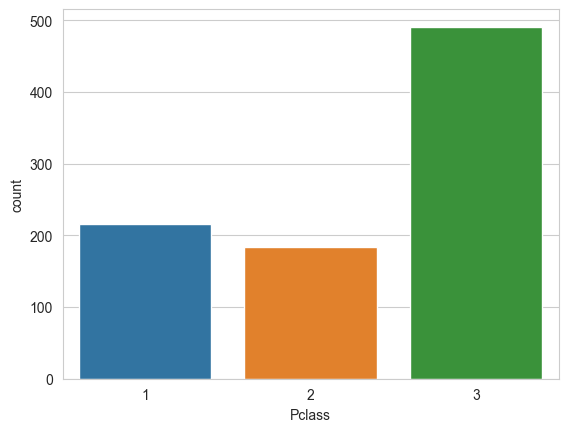

In [17]:
sns.countplot(x='Pclass',data=df)

Most of the people were in Pclass 3 as compared to class 1 and 2 , must be including staff and other workers on ship

<AxesSubplot: xlabel='Survived', ylabel='count'>

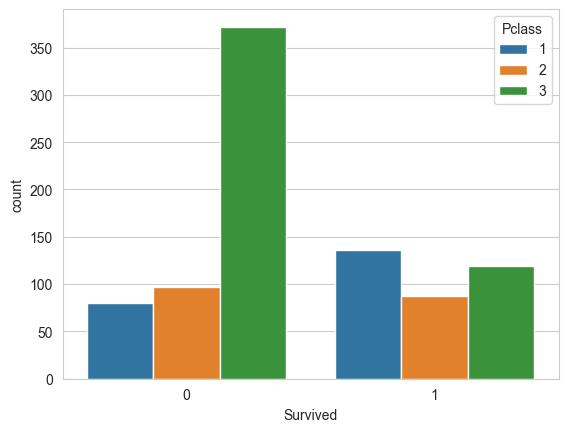

In [23]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=df,hue='Pclass')

Pclass 3 people did not survived much. Pclass 1 survived was comparitively higher.

<AxesSubplot: xlabel='Age'>

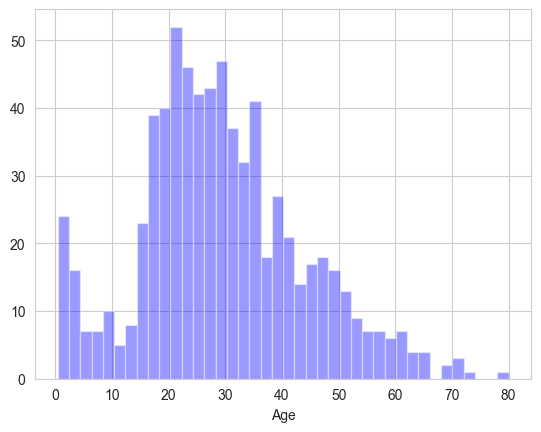

In [24]:
sns.distplot(df['Age'].dropna(),kde=False, color='blue',bins=40)


<AxesSubplot: xlabel='SibSp', ylabel='count'>

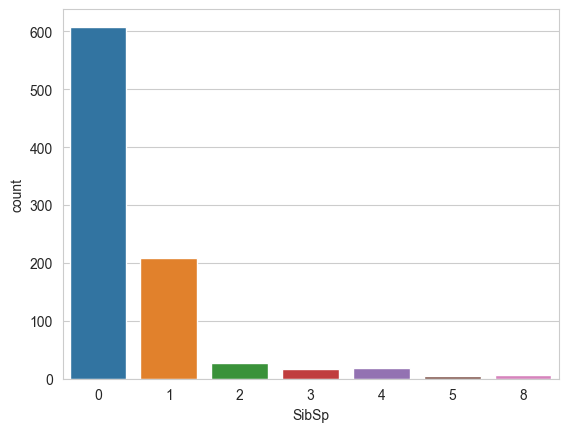

In [26]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot: >

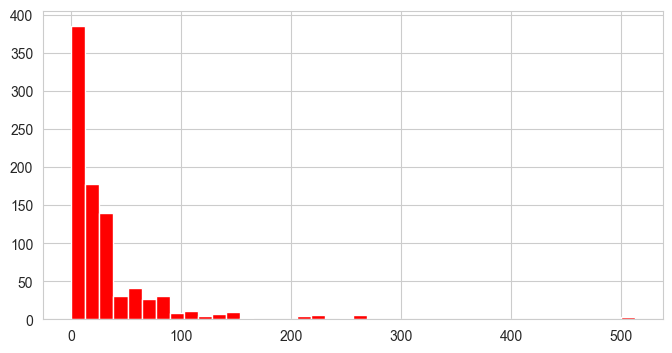

In [28]:
df['Fare'].hist(bins=40,color='red',figsize=(8,4))

<AxesSubplot: xlabel='Parch', ylabel='count'>

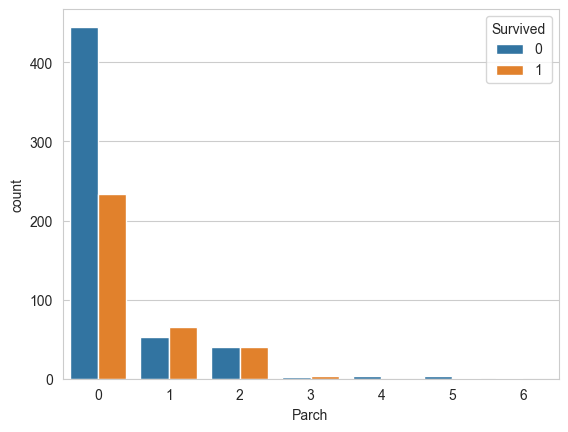

In [30]:
sns.countplot(x='Parch', hue='Survived', data=df)

In [32]:
#DATA CLEANING
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot: xlabel='Pclass', ylabel='Age'>

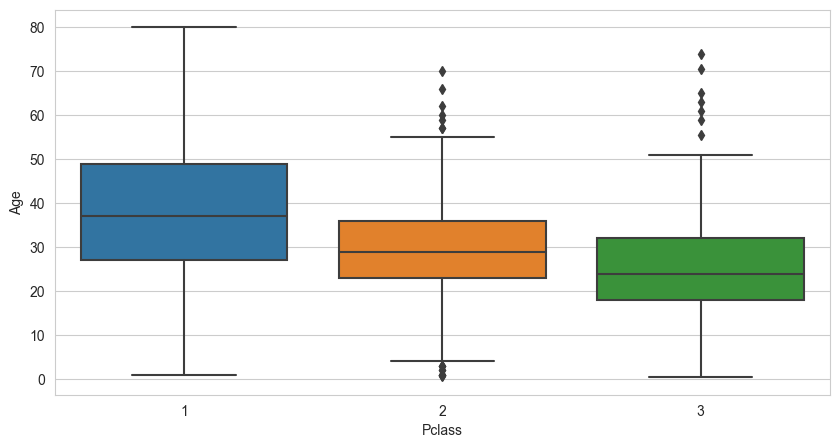

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass',y='Age',data=df)

There are 3 passenger class in Titanic dataset. Rich people in highr class seems older, compared to class 2 and class 3. So lets impute the NAN with average of age. Pclass 1 average age is around 37 ,pclass 2 is around 29 and pclass 3 it's around 24.

In [38]:
#create a function to fill the missing age data
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        
        else:
            return 24
        
    else :
        return Age

In [40]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

In [43]:
#lets drop cabin column as there is very less information available in the column.
df.drop('Cabin',axis=1,inplace=True)

In [44]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [45]:
#Lets remove nan from emabrked column.
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [46]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

ALl the NAN values have been filled. Now lets remove columns such as Name and Ticket as they will be of no use in prediction process.

In [47]:
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [48]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [51]:
#converting into categorical features(using label encoder)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [52]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


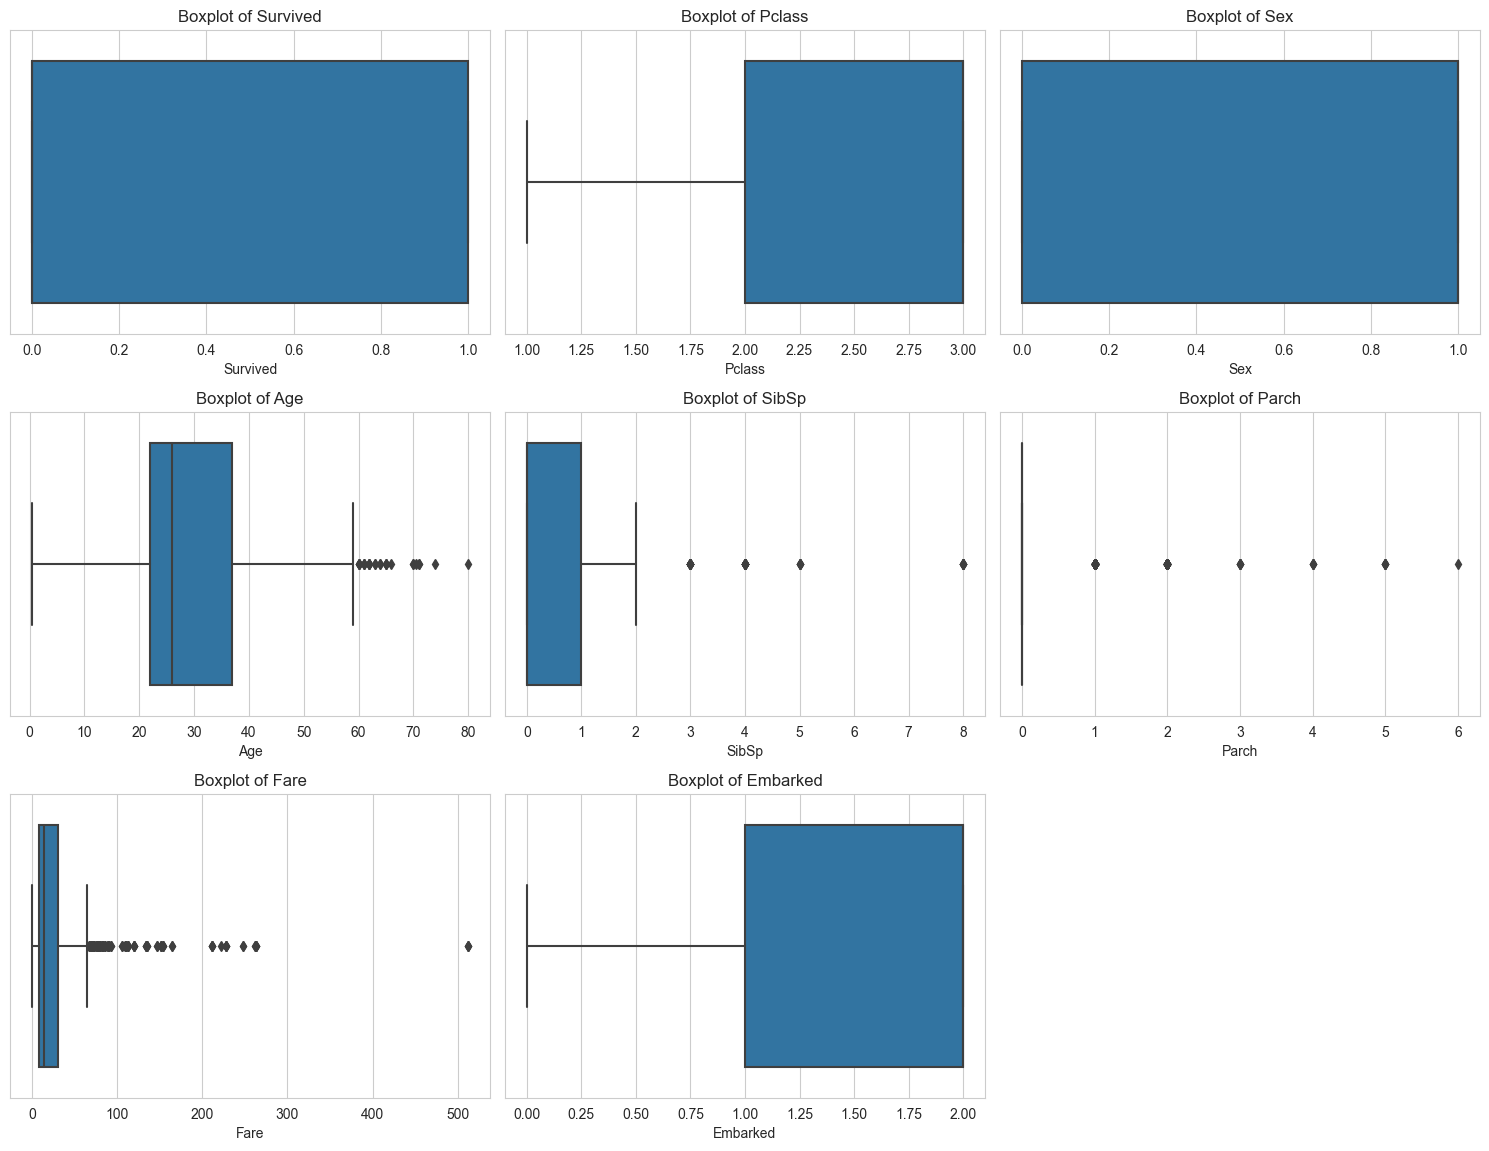

In [56]:
#outlier removal
# Create a boxplot for each column in the dataset
plt.figure(figsize=(15, 15))
for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)  # Adjust the number of rows and columns as needed
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [57]:
from scipy import stats

In [60]:
from scipy.stats import zscore

z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [61]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (891, 8)
After removing outliers:: (820, 8)


71 rows have been removed to reduce the outliers in the data.

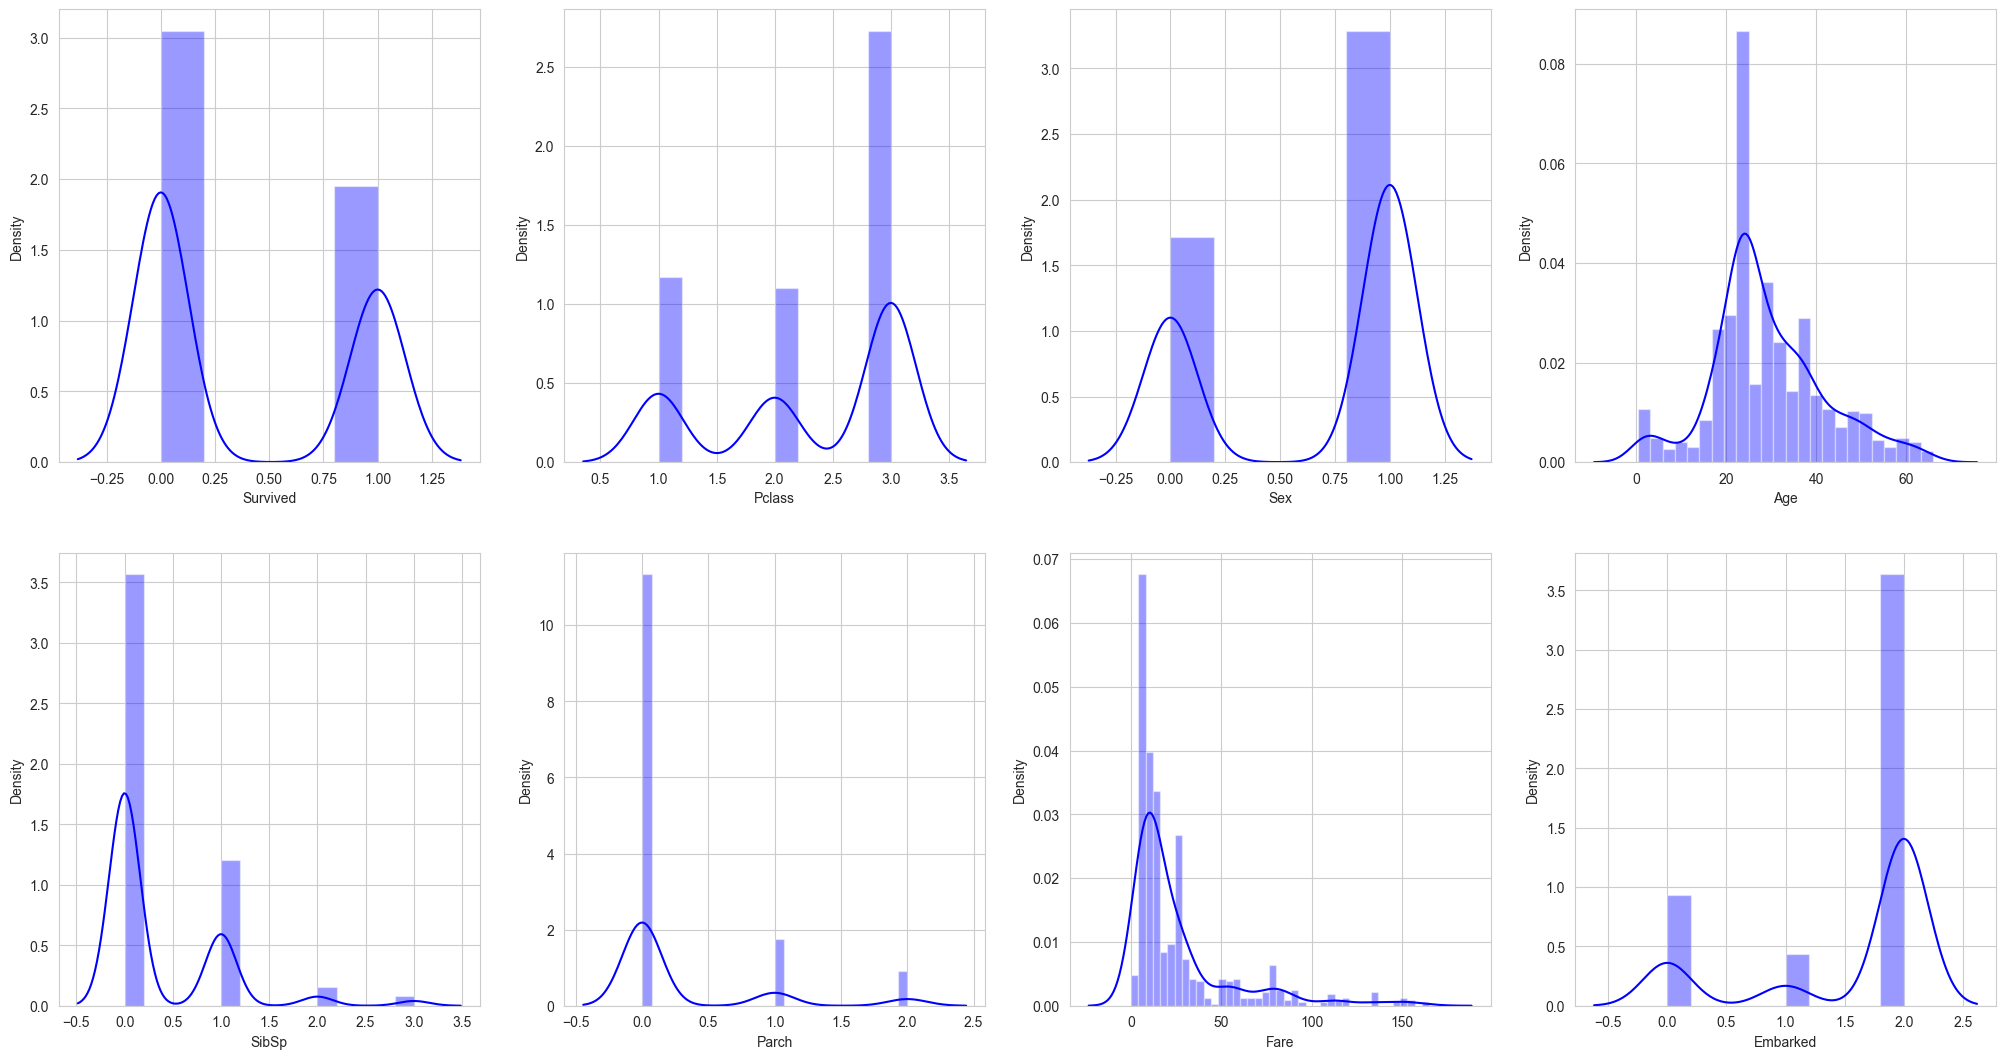

In [67]:
#Skewness Removal
plt.figure(figsize=(25,20))
for i in enumerate(df_1):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df_1[i[1]],color='b')

In [68]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.548256
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

Lets reomove skewness from the numerical column.

In [69]:
from sklearn.preprocessing import power_transform

df_1[['Pclass','SibSp','Parch','Fare']]=power_transform(df_1[['Pclass','SibSp','Parch','Fare']],method='yeo-johnson')

In [71]:
df_1.skew()

Survived    0.450825
Pclass     -0.429718
Sex        -0.664152
Age         0.447804
SibSp       0.948944
Parch       1.581505
Fare       -0.018602
Embarked   -1.277386
dtype: float64

Skewness is reduced to minimum possible.

In [73]:
#Splititng the data
x=df_1.drop(['Survived'],axis=1)
y=df_1['Survived']

In [74]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [75]:
#Converting the data into DataFrame
pd.DataFrame(x)

,0,1,2,3,4,5,6
0,1.000000,1.0,0.329064,0.926317,0.0,0.445667,1.0
1,0.000000,0.0,0.573041,0.926317,0.0,0.855230,0.0
2,1.000000,0.0,0.390058,0.000000,0.0,0.461339,1.0
3,0.000000,0.0,0.527295,0.926317,0.0,0.803218,1.0
4,1.000000,1.0,0.527295,0.000000,0.0,0.464103,1.0
...,...,...,...,...,...,...,...
815,0.373447,1.0,0.405306,0.000000,0.0,0.549814,1.0
816,0.000000,0.0,0.283318,0.000000,0.0,0.701010,1.0
817,1.000000,0.0,0.359561,0.926317,1.0,0.656525,1.0
818,0.000000,1.0,0.390058,0.000000,0.0,0.701010,0.0


In [76]:
#Balancing data using random under sampler
from imblearn.under_sampling import RandomUnderSampler

In [77]:
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (820,)
Resample Target dataset shape (640,)


In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [83]:
#MODELLING (Importing Necessary libraries)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [85]:
dt = DecisionTreeClassifier(random_state = 42)
svm = SVC(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
lr = LogisticRegression(random_state = 42)
ab=AdaBoostClassifier()
bc=BaggingClassifier()
etc=ExtraTreesClassifier()
gbc=GradientBoostingClassifier()

In [86]:
# Define the list classifiers
classifiers = [
    ("dt" , dt),
    ("svm" , svm),
    ("rf" , rf),
    ("lr", lr),
    ("ab",ab),
    ("bc",bc),
    ("etc",etc),
    ("gbc",gbc)
    ]

In [88]:
# Dictionary to store accuracy and cross-validation scores
scores_dict = {}

for clf_name, clf in classifiers:
    # Fit clf to the training set
    clf.fit(x_train, y_train)
    
    # Predict y_pred
    y_pred = clf.predict(x_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    # Evaluate clf's accuracy on the test set
    print(f'{clf_name} score: {acc:.3f}')
    
    # Perform cross-validation and calculate the mean score
    cv_scores = cross_val_score(clf, x_train, y_train, cv=5)
    mean_cv_score = cv_scores.mean()
    
    # Calculate the difference between accuracy and cross-validation score
    difference = acc - mean_cv_score
    
    # Store the results in the dictionary
    scores_dict[clf_name] = {
        'Accuracy': acc,
        'CrossValScores': cv_scores,
        'MeanCrossValScore': mean_cv_score,
        'Difference': difference
    }
    
    # Print the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Print classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)
    print()

# Print the results
for clf_name, results in scores_dict.items():
    print(f"{clf_name}:")
    print(f"Accuracy: {results['Accuracy']:.2f}")
    print("Cross-validation scores:", results['CrossValScores'])
    print(f"Mean Cross-validation score: {results['MeanCrossValScore']:.2f}")
    print(f"Difference between Accuracy and Cross-validation score: {results['Difference']:.2f}")
    print()


dt score: 0.728
Confusion Matrix:
[[68 24]
 [23 58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74        92
           1       0.71      0.72      0.71        81

    accuracy                           0.73       173
   macro avg       0.73      0.73      0.73       173
weighted avg       0.73      0.73      0.73       173


svm score: 0.775
Confusion Matrix:
[[77 15]
 [24 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        92
           1       0.79      0.70      0.75        81

    accuracy                           0.77       173
   macro avg       0.78      0.77      0.77       173
weighted avg       0.78      0.77      0.77       173


rf score: 0.792
Confusion Matrix:
[[78 14]
 [22 59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        92
      

The classifier "ab" (AdaBoost Classifier) has the highest accuracy (0.81) and a relatively high mean cross-validation score (0.75). The difference between accuracy and the mean cross-validation score is 0.06.

In [92]:
#Hyperparametr Tuning
from sklearn.model_selection import GridSearchCV

In [93]:
parameters={'criterion':['gini','entropy'],
            'random_state':[10,50,1000],
            'max_depth':[0,10,20],
            'n_jobs':[-2,-1,1],
            'n_estimators':[50,100,200,300]}

In [99]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=10)

In [100]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [103]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 10}

In [104]:
Final_model=ExtraTreesClassifier(criterion='entropy',max_depth=10,n_estimators=50,n_jobs=-2,random_state=10)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

81.5028901734104


In [105]:
import joblib

In [106]:
#save the best score model in joblib
joblib.dump(Final_model,'Titanic_PredictionModel')

['Titanic_PredictionModel']

In [107]:
# Create a DataFrame to display the actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first few rows of the results
print(results.head())

     Actual  Predicted
570       1          0
265       0          0
291       0          0
597       1          0
174       0          0
